In [1]:
import seaborn as sns
sns.set(rc={'figure.figsize':(10,8)})
sns.set_theme(style="ticks")
import matplotlib.pyplot as plt
#import community
from networkx.algorithms.community import greedy_modularity_communities
#import community.community_louvain as cl
import pandas as pd
import scipy.stats as stats
import networkx as nx
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [2]:
df_wisconsin_sim = pd.read_csv('wisconsin_cosine_weights1.csv')

In [3]:
df_wisconsin = df_wisconsin_sim[['source','target','weight']]
df_wisconsin['weight']= 1 - df_wisconsin['weight']
df_wisconsin.head()

,source,target,weight
0,0,20,0.003466
1,0,28,0.006086
2,0,99,0.011315
3,0,104,0.015404
4,0,200,0.006053


In [4]:
df_nodes=pd.read_csv('wisconsin_labels.csv')

In [5]:
#scaler = MinMaxScaler(feature_range=(0, 1)) #
#df_wisconsin['weight'] = scaler.fit_transform(df_wisconsin[['weight']])#
#df_wisconsin.head()

In [6]:
df_wisconsin.describe()

,source,target,weight
count,450.000000,450.000000,450.000000
mean,81.231111,158.624444,0.021225
std,53.359769,58.042944,0.023583
min,0.000000,7.000000,0.000282
25%,37.000000,102.000000,0.004494
50%,79.000000,168.000000,0.008475
75%,104.000000,205.000000,0.040455
max,242.000000,250.000000,0.078128


In [7]:
wisconsin_graph= nx.from_pandas_edgelist(df_wisconsin, 'source', 'target', create_using=nx.DiGraph())

In [8]:
wisconsin_graph.number_of_edges()

450

In [9]:
GNN_dist= nx.from_pandas_edgelist(df_wisconsin, 'source', 'target', edge_attr='weight', 
                             create_using=nx.DiGraph())

In [10]:
GNN_sim= nx.from_pandas_edgelist(df_wisconsin_sim, 'source', 'target', edge_attr='weight', 
                             create_using=nx.DiGraph())

# Degree Centrality

## GNN_wisconsin

In [11]:
# Calculate the weighted degree centrality
def weighted_out_degree(G):
  # Calcolo della weighted out-degree centrality
  out_degrees = dict(G.out_degree(weight='weight'))
  max_weight = max(out_degrees.values())
  weighted_out_degrees = {node: (degree / max_weight) for node, degree in out_degrees.items()}

  # Calcolo della somma delle weighted out-degree centralities
  total_weighted_out_degree = sum(weighted_out_degrees.values())

  # Normalizzazione della weighted out-degree centrality
  weighted_out_degree_centrality_normalized = {node: (degree / total_weighted_out_degree) for node, degree in weighted_out_degrees.items()}
  return dict(sorted(weighted_out_degree_centrality_normalized.items(), key=lambda x: x[1], reverse=True))
# Print the result

def weighted_in_degree(G):
  in_degrees = dict(G.in_degree(weight='weight'))
  max_weight = max(in_degrees.values())
  weighted_in_degrees = {node: (degree / max_weight) for node, degree in in_degrees.items()}

  # Calcolo della somma delle weighted in-degree centralities
  total_weighted_in_degree = sum(weighted_in_degrees.values())

  # Normalizzazione della weighted in-degree centrality
  weighted_in_degree_centrality_normalized = {node: (degree / total_weighted_in_degree) for node, degree in weighted_in_degrees.items()}

  return dict(sorted(weighted_in_degree_centrality_normalized.items(), key=lambda x: x[1], reverse=True))

In [12]:
GNN_dist_out_degree = weighted_out_degree(GNN_dist)
GNN_dist_in_degree = weighted_in_degree(GNN_dist)

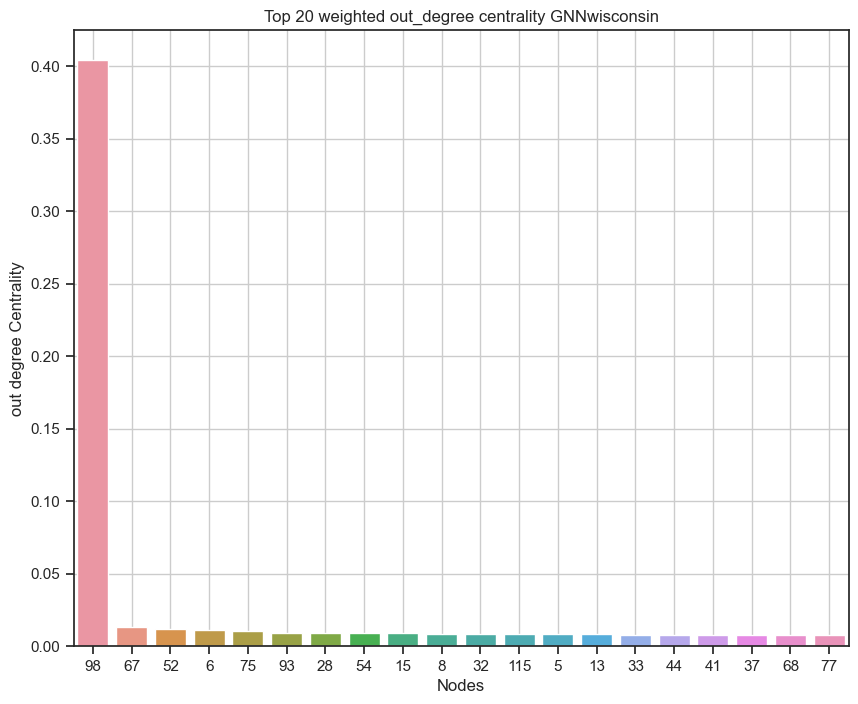

In [13]:
keys = list(map(str,list(GNN_dist_out_degree.keys())[:20]))
values = list(GNN_dist_out_degree.values())[:20]

# Create a barplot
sns.barplot(x=keys, y=values)

# Add labels and title
plt.xlabel('Nodes')
plt.ylabel('out degree Centrality')
plt.title('Top 20 weighted out_degree centrality GNNwisconsin')
plt.grid()
plt.show()

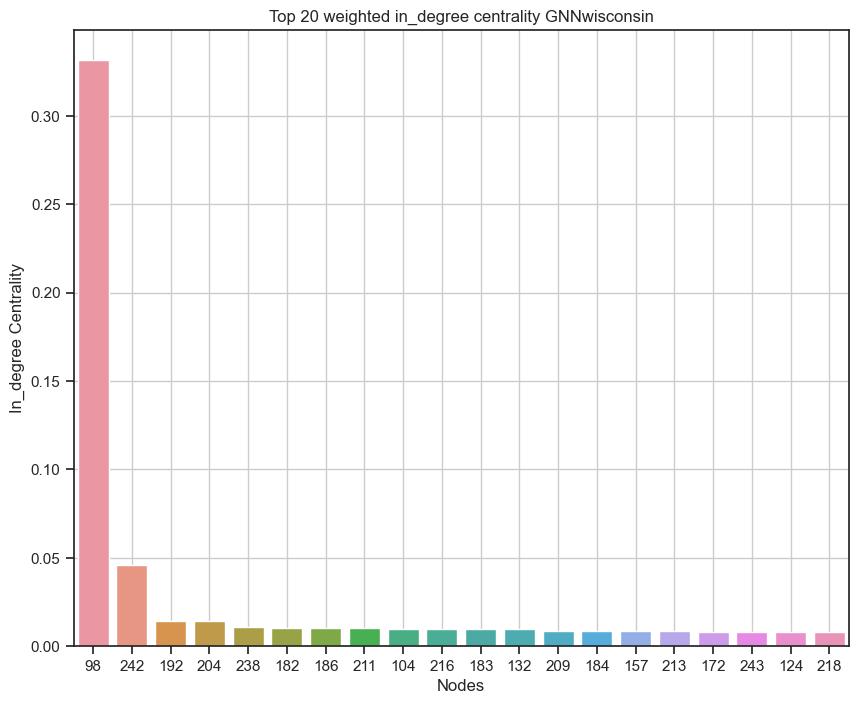

In [14]:
keys = list(map(str,list(GNN_dist_in_degree.keys())[:20]))
values = list(GNN_dist_in_degree.values())[:20]

# Create a barplot
sns.barplot(x=keys, y=values)

# Add labels and title
plt.xlabel('Nodes')
plt.ylabel('In_degree Centrality')
plt.title('Top 20 weighted in_degree centrality GNNwisconsin')
plt.grid()
plt.show()

## wisconsin graph

In [15]:
wisconsin_out_degree = weighted_out_degree(wisconsin_graph)
wisconsin_in_degree = weighted_in_degree(wisconsin_graph)

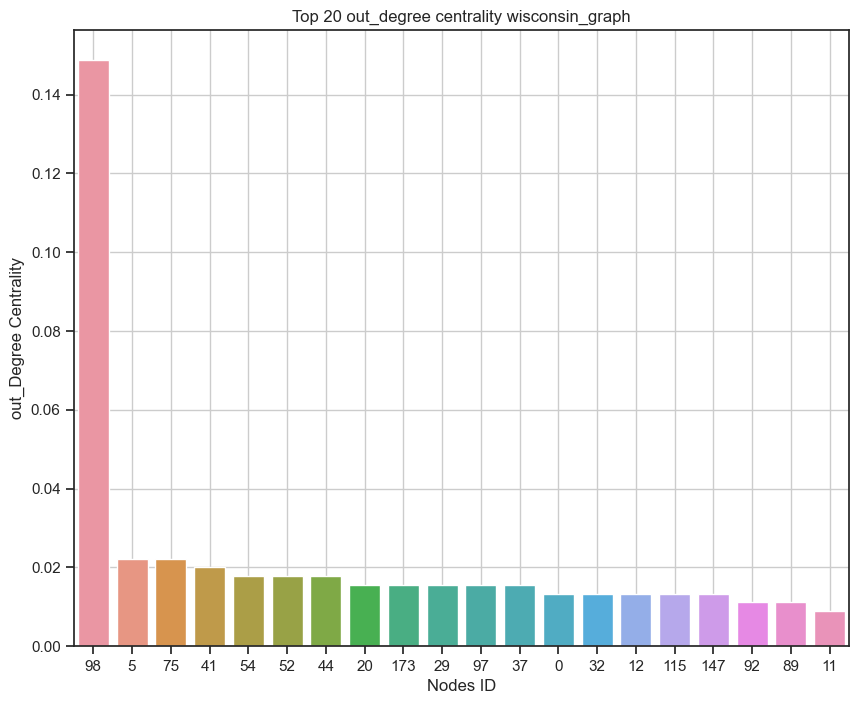

In [16]:

keys = list(map(str,list(wisconsin_out_degree.keys())[:20]))
values = list(wisconsin_out_degree.values())[:20]

# Create a barplot
sns.barplot(x=keys, y=values)

# Add labels and title
plt.xlabel('Nodes ID')
plt.ylabel('out_Degree Centrality')
plt.title('Top 20 out_degree centrality wisconsin_graph')
plt.grid()
plt.show()

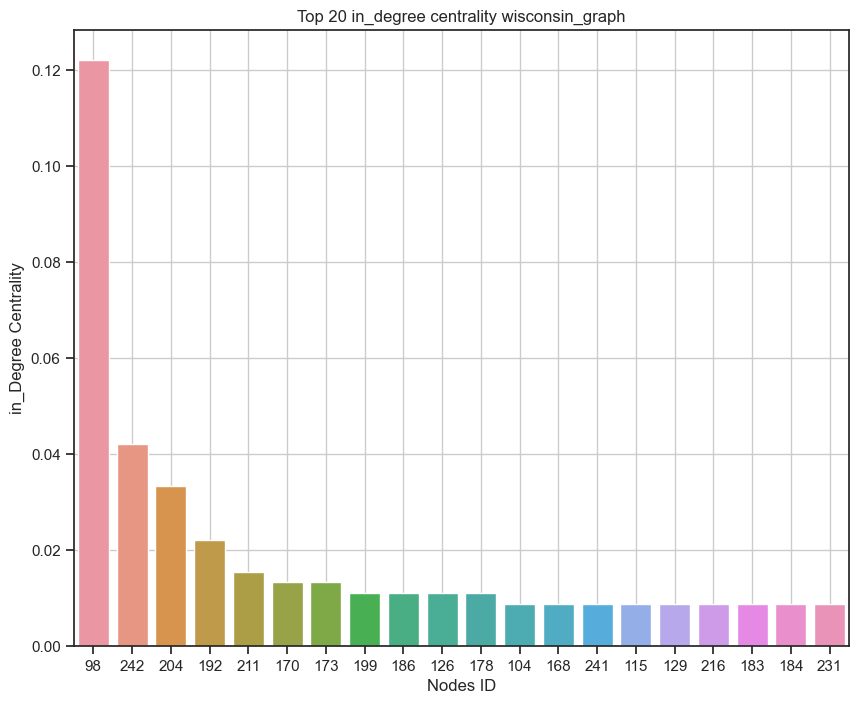

In [17]:
keys = list(map(str,list(wisconsin_in_degree.keys())[:20]))
values = list(wisconsin_in_degree.values())[:20]

# Create a barplot
sns.barplot(x=keys, y=values)

# Add labels and title
plt.xlabel('Nodes ID')
plt.ylabel('in_Degree Centrality')
plt.title('Top 20 in_degree centrality wisconsin_graph')
plt.grid()
plt.show()

# Betweeness centrality

## GNN_wisconsin

In [18]:
#questa centralità interpreta i pesi come distanza
GNN_betweeness = nx.betweenness_centrality(GNN_dist, weight = 'weight')

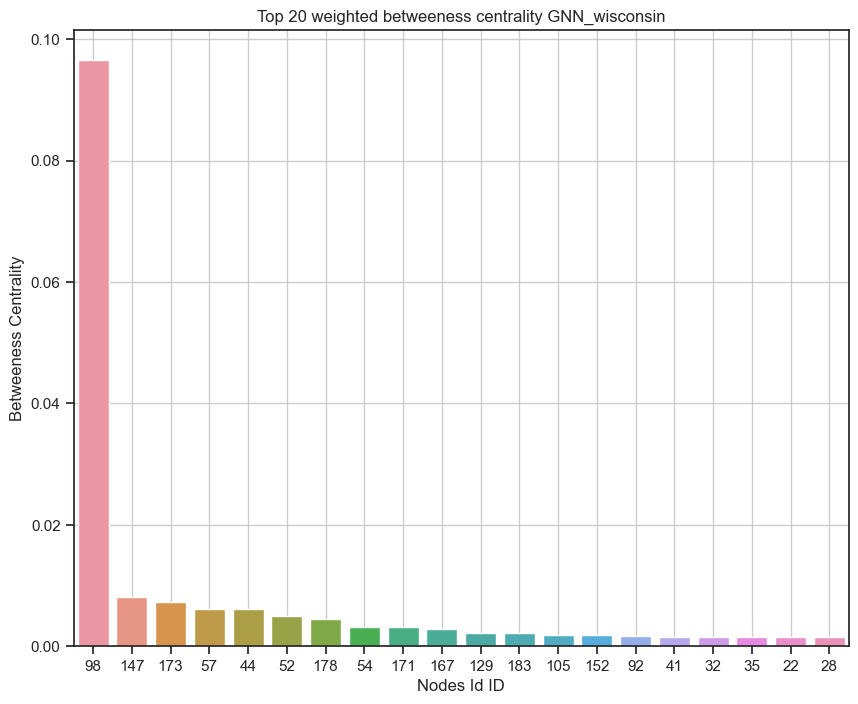

In [19]:
GNN_betweeness = dict(sorted(GNN_betweeness.items(), key=lambda x: x[1], reverse=True))
keys = list(map(str,list(GNN_betweeness.keys())[:20]))
values = list(GNN_betweeness.values())[:20]

# Create a barplot
sns.barplot(x=keys, y=values)

# Add labels and title
plt.xlabel('Nodes Id ID')
plt.ylabel('Betweeness Centrality')
plt.title('Top 20 weighted betweeness centrality GNN_wisconsin')
plt.grid()
plt.show()

## wisconsin graph

In [20]:
bet_wisconsin_graph = nx.betweenness_centrality(wisconsin_graph)

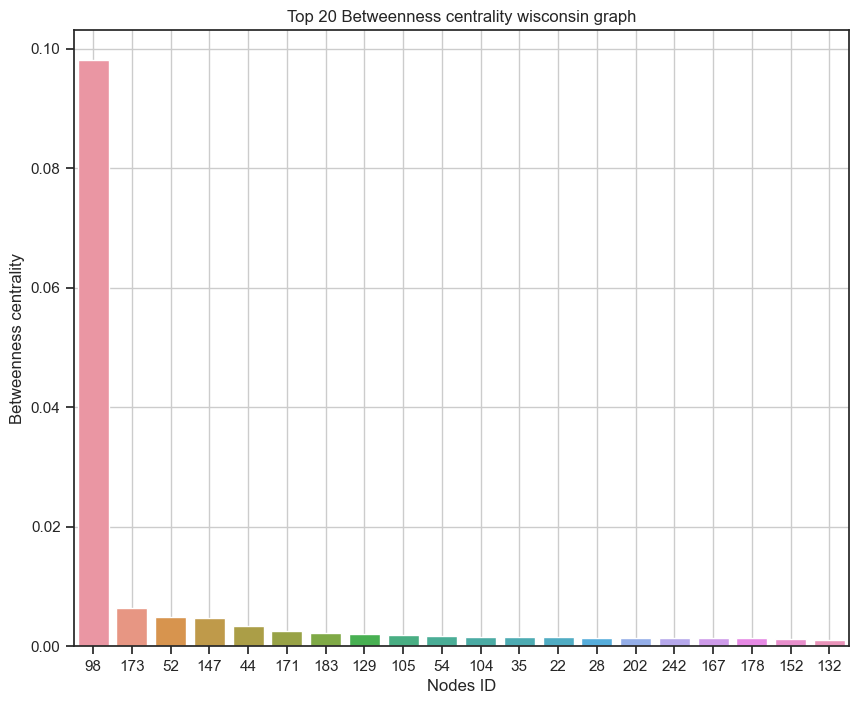

In [21]:
bet_wisconsin_graph = dict(sorted(bet_wisconsin_graph.items(), key=lambda x: x[1], reverse=True))
keys = list(map(str,list(bet_wisconsin_graph.keys())[:20]))
values = list(bet_wisconsin_graph.values())[:20]

# Create a barplot
sns.barplot(x=keys, y=values)

# Add labels and title
plt.xlabel('Nodes ID')
plt.ylabel('Betweenness centrality')
plt.title('Top 20 Betweenness centrality wisconsin graph')
plt.grid()
plt.show()

# Closeness Centrality

## GNN_wisconsin

In [22]:
#questa centralità interpreta i pesi come distanza
GNN_closeness = nx.closeness_centrality(GNN_dist, distance = 'weight')

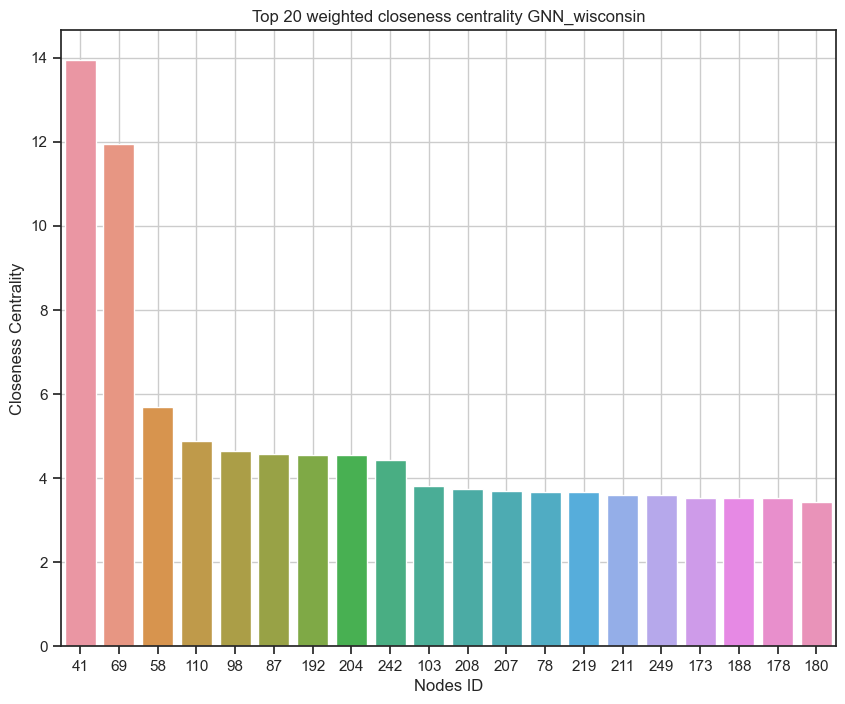

In [23]:
GNN_closeness = dict(sorted(GNN_closeness.items(), key=lambda x: x[1], reverse=True))
keys = list(map(str,list(GNN_closeness.keys())[:20]))
values = list(GNN_closeness.values())[:20]

# Create a barplot
sns.barplot(x=keys, y=values)

# Add labels and title
plt.xlabel('Nodes ID')
plt.ylabel('Closeness Centrality')
plt.title('Top 20 weighted closeness centrality GNN_wisconsin')
plt.grid()
plt.show()

## wisconsin

In [24]:
closeness_wisconsin_graph = nx.closeness_centrality(wisconsin_graph)

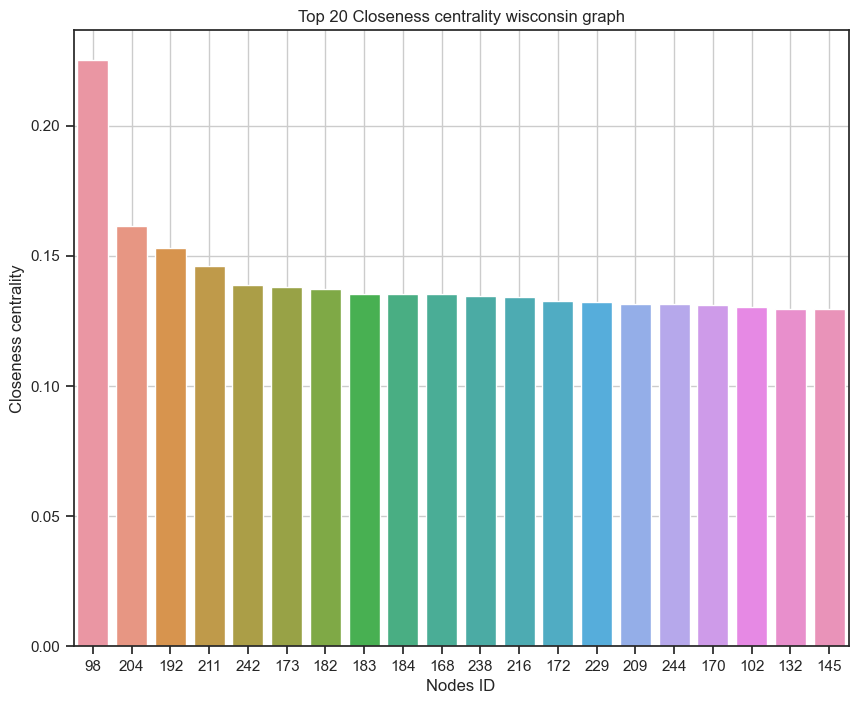

In [25]:
closeness_wisconsin_graph = dict(sorted(closeness_wisconsin_graph.items(), key=lambda x: x[1], reverse=True))
keys = list(map(str,list(closeness_wisconsin_graph.keys())[:20]))
values = list(closeness_wisconsin_graph.values())[:20]

# Create a barplot
sns.barplot(x=keys, y=values)

# Add labels and title
plt.xlabel('Nodes ID')
plt.ylabel('Closeness centrality')
plt.title('Top 20 Closeness centrality wisconsin graph')
plt.grid()
plt.show()

# Eigenvectror Centrality

## GNN_wisconsin

In [26]:
GNN_eigenvector = nx.eigenvector_centrality(GNN_sim, weight = 'weight', max_iter = 500)

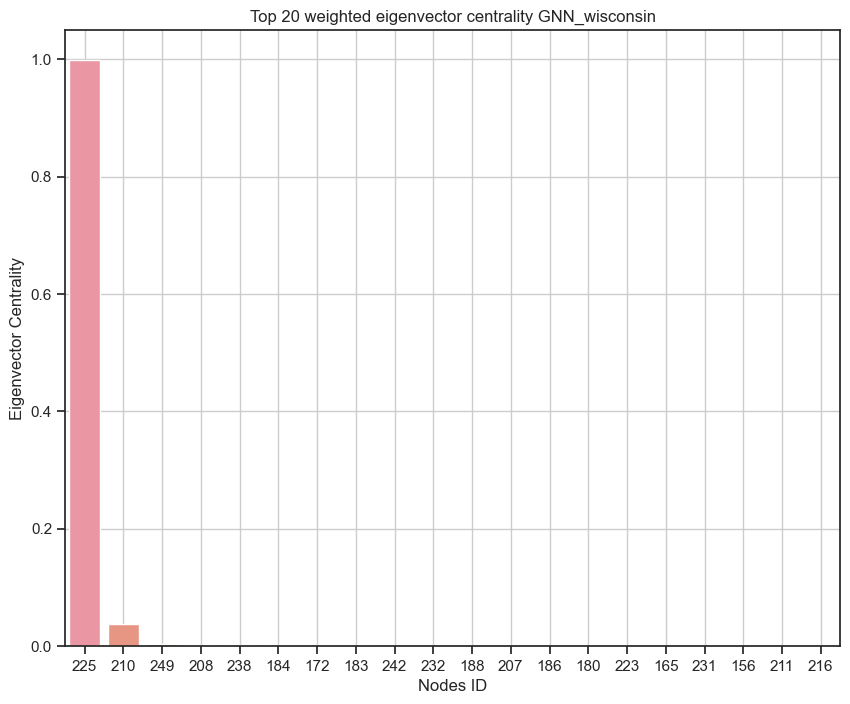

In [27]:
GNN_eigenvector = dict(sorted(GNN_eigenvector.items(), key=lambda x: x[1], reverse=True))
keys = list(map(str,list(GNN_eigenvector.keys())[:20]))
values = list(GNN_eigenvector.values())[:20]

# Create a barplot
sns.barplot(x=keys, y=values)

# Add labels and title
plt.xlabel('Nodes ID')
plt.ylabel('Eigenvector Centrality')
plt.title('Top 20 weighted eigenvector centrality GNN_wisconsin')
plt.grid()
plt.show()

## wisconsin graph

In [28]:
eigen_wisconsin_graph = nx.eigenvector_centrality(wisconsin_graph, max_iter=300)

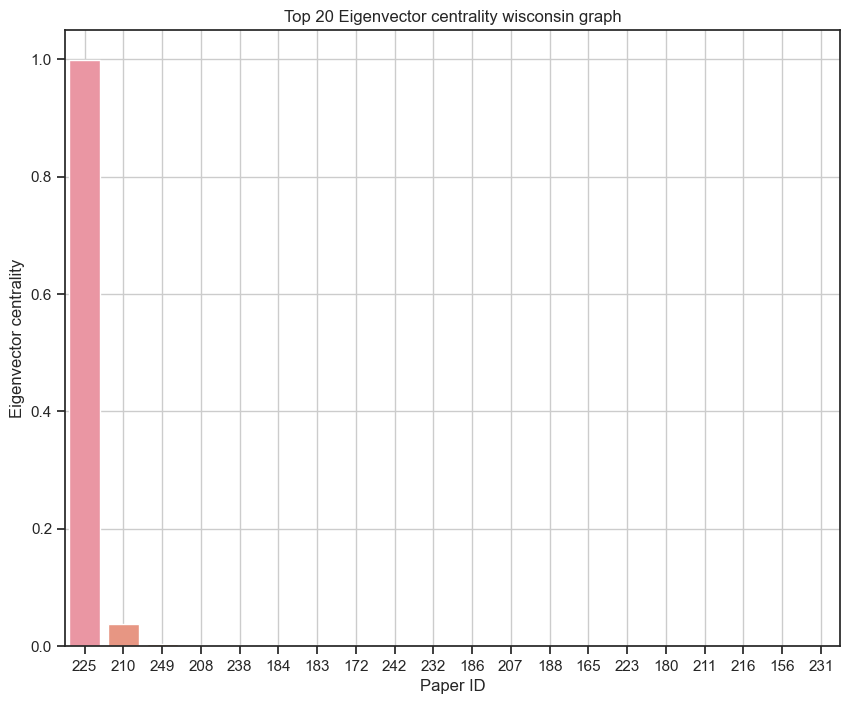

In [29]:
eigen_wisconsin_graph = dict(sorted(eigen_wisconsin_graph.items(), key=lambda x: x[1], reverse=True))
keys = list(map(str,list(eigen_wisconsin_graph.keys())[:20]))
values = list(eigen_wisconsin_graph.values())[:20]

# Create a barplot
sns.barplot(x=keys, y=values)

# Add labels and title
plt.xlabel('Paper ID')
plt.ylabel('Eigenvector centrality')
plt.title('Top 20 Eigenvector centrality wisconsin graph')
plt.grid()
plt.show()

# Efficiency

In [30]:
# Calculate the weighted global efficiency
def weighted_global_efficiency(G):
  weighted_efficiency = 0
  for node in G.nodes():
      shortest_paths = nx.shortest_path_length(G, source=node, weight='weight')
      efficiency = sum([1.0 / d for d in shortest_paths.values() if d > 0])
      weighted_efficiency += efficiency

  weighted_efficiency /= (len(G) * (len(G) - 1))
  return round(weighted_efficiency, 3)

In [31]:
#efficiency sulla rete vista dalla GNN
weighted_global_efficiency(GNN_dist)

2.914

In [32]:
weighted_global_efficiency(wisconsin_graph)

0.051

## Modularity

In [33]:

def weighted_modularty(G):
  # Compute the partition of the graph using the Louvain method
  partition = greedy_modularity_communities(G, weight='weight')

  # Compute the modularity of the partition using the Louvain method
  modularity = nx.algorithms.community.quality.modularity(G, partition, weight='weight')
  return round(modularity, 3)

In [34]:
print(weighted_modularty(GNN_sim))

0.631


In [35]:
print(weighted_modularty(wisconsin_graph))

0.626


# Community

In [36]:
#define Jaccard Similarity function
def jaccard(list1, list2):
    intersection = len(list(set(list1).intersection(list2)))
    union = (len(list1) + len(list2)) - intersection
    return float(intersection) / union

comm_GNN = greedy_modularity_communities(GNN_sim, weight='weight')
comm_wisconsin = greedy_modularity_communities(wisconsin_graph)

In [37]:
print(len(comm_GNN))
print(len(comm_wisconsin))

11
11


In [51]:
for c in range(len(comm_GNN)):
    print(len(comm_GNN[c]),len(comm_wisconsin[c]),jaccard(comm_GNN[c], comm_wisconsin[c]))


57 61 0.9344262295081968
44 42 0.0
42 36 0.0
21 21 1.0
16 21 0.0
16 20 0.0
16 16 0.0
14 14 1.0
13 8 0.6153846153846154
7 7 0.0
5 5 1.0


In [38]:
labels = df_nodes['label'].unique()
mapping = {}
for i in range(len(df_nodes)):
  mapping[i] = df_nodes.loc[i]['label']

In [39]:
def gini_index(cluster, labels):
    """
    Calculates the Gini Index for a given cluster of objects and 7 labels.

    Parameters:
        cluster (list): A list of objects in the cluster.
        labels (list): A list of 7 labels.

    Returns:
        float: The Gini Index for the given cluster and labels.
    """
    total_count = len(cluster)
    if total_count == 0:
        return 0.0

    gini_sum = 0.0
    for label in labels:
        label_count = sum([1 for obj in cluster if mapping[obj] == label])
        label_freq = label_count / total_count
        gini_sum += label_freq ** 2

    gini_index = 1.0 - gini_sum  
    return round(gini_index, 3)

In [40]:
import scipy

gini_GNN = [gini_index(i,labels) for i in comm_GNN]
gini_wisconsin = [gini_index(i,labels) for i in comm_wisconsin]

In [41]:
print([len(com) for com in comm_GNN])
print([len(com) for com in comm_wisconsin])

[57, 44, 42, 21, 16, 16, 16, 14, 13, 7, 5]
[61, 42, 36, 21, 21, 20, 16, 14, 8, 7, 5]


<AxesSubplot:>

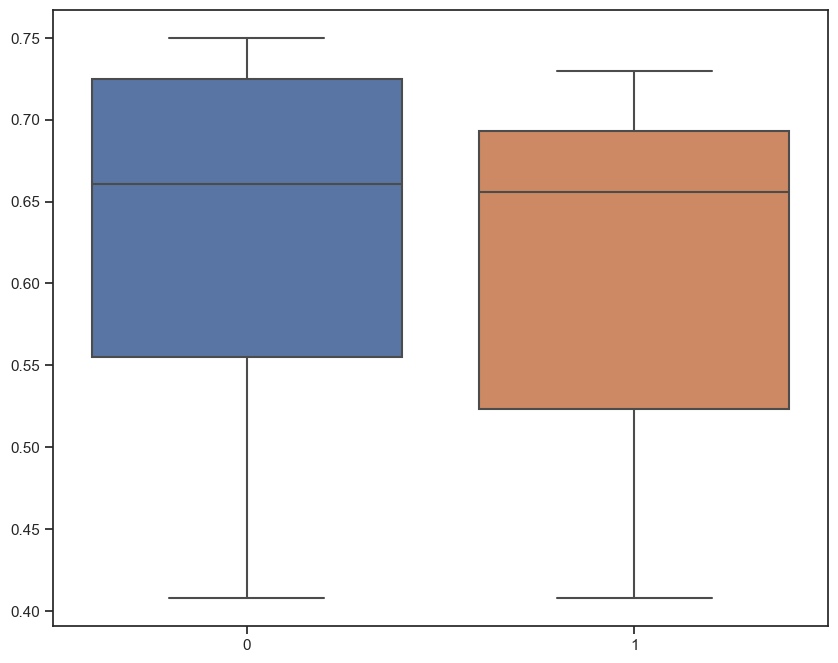

In [42]:
import numpy as np
import seaborn as sns

all_arr = [gini_GNN, gini_wisconsin]

sns.boxplot(data=all_arr, )

In [43]:
gini=0
clusters = comm_GNN
for com in clusters:
  
  gini += gini_index(com, labels)
avg_gini= round(gini/len(clusters), 3)

avg_gini

0.633

In [44]:
gini=0
clusters = comm_wisconsin
for com in clusters:
  
  gini += gini_index(com, labels)
avg_gini= round(gini/len(clusters), 3)

avg_gini

0.613

In [45]:
#out degree
x1 = list(GNN_dist_out_degree.keys())[:100]
x2 = list(wisconsin_out_degree.keys())[:100]
tau, p_value = stats.kendalltau(x1, x2)
j = jaccard(x1,x2)
#w_t, w_p = stats.weightedtau(x1,x2) #vedo se considerarlo
print('tau:',tau)
print('p_value',p_value)
#print('w-tau:',w_t)
#print('w-p_value',w_p)
print('Jaccard Index:', j )

print(x1)
print(x2)

tau: 0.06989898989898992
p_value 0.30280894319079166
Jaccard Index: 0.6129032258064516
[98, 67, 52, 6, 75, 93, 28, 54, 15, 8, 32, 115, 5, 13, 33, 44, 41, 37, 68, 77, 18, 59, 60, 92, 2, 10, 23, 40, 95, 80, 4, 57, 45, 11, 88, 35, 31, 55, 16, 56, 19, 12, 25, 76, 94, 29, 17, 78, 14, 1, 47, 96, 63, 27, 82, 86, 58, 69, 0, 79, 50, 97, 89, 147, 173, 20, 22, 109, 24, 233, 53, 156, 149, 205, 170, 107, 21, 38, 171, 148, 152, 150, 242, 186, 215, 167, 84, 131, 34, 74, 143, 9, 81, 91, 73, 7, 122, 160, 125, 194]
[98, 5, 75, 41, 54, 52, 44, 20, 173, 29, 97, 37, 0, 32, 12, 115, 147, 92, 89, 11, 25, 63, 79, 31, 50, 178, 57, 67, 156, 171, 93, 128, 28, 3, 45, 6, 8, 107, 152, 35, 27, 69, 33, 53, 34, 51, 122, 46, 68, 91, 96, 167, 120, 104, 2, 4, 81, 170, 201, 10, 13, 197, 15, 18, 21, 24, 26, 30, 38, 129, 48, 49, 86, 155, 160, 78, 74, 84, 202, 143, 148, 150, 158, 200, 7, 1, 66, 101, 168, 242, 9, 87, 47, 58, 64, 14, 186, 16, 17, 130]


In [46]:
#in degree
x1 = list(GNN_dist_in_degree.keys())[:100]
x2 = list(wisconsin_in_degree.keys())[:100]
tau, p_value = stats.kendalltau(x1, x2)
j = jaccard(x1,x2)
#w_t, w_p = stats.weightedtau(x1,x2) #vedo se considerarlo
print('tau:',tau)
print('p_value',p_value)
#print('w-tau:',w_t)
#print('w-p_value',w_p)
print('Jaccard Index:', j )

print(x1)
print(x2)

tau: 0.17373737373737377
p_value 0.010431716133674185
Jaccard Index: 0.6666666666666666
[98, 242, 192, 204, 238, 182, 186, 211, 104, 216, 183, 132, 209, 184, 157, 213, 172, 243, 124, 218, 230, 177, 187, 193, 123, 137, 220, 105, 111, 131, 168, 99, 173, 133, 139, 135, 170, 138, 163, 235, 109, 227, 146, 175, 125, 102, 244, 113, 145, 134, 237, 174, 154, 189, 229, 205, 130, 129, 114, 126, 190, 147, 155, 44, 202, 153, 144, 169, 115, 171, 167, 199, 203, 195, 141, 246, 152, 236, 197, 231, 161, 249, 160, 79, 50, 159, 52, 97, 245, 149, 156, 77, 206, 72, 101, 127, 207, 178, 208, 225]
[98, 242, 204, 192, 211, 170, 173, 199, 186, 126, 178, 104, 168, 241, 115, 129, 216, 183, 184, 231, 229, 207, 52, 195, 141, 236, 246, 44, 87, 144, 152, 197, 243, 79, 103, 102, 97, 245, 206, 132, 145, 217, 182, 165, 160, 156, 172, 202, 161, 163, 189, 209, 238, 244, 188, 232, 208, 99, 54, 101, 201, 127, 64, 130, 149, 113, 111, 69, 50, 175, 191, 151, 122, 226, 121, 119, 135, 230, 114, 155, 190, 159, 147, 203, 153, 193, 

In [47]:
#betweennes
x1 = list(GNN_betweeness.keys())[:100]
x2 = list(bet_wisconsin_graph.keys())[:100]
tau, p_value = stats.kendalltau(x1, x2)
j = jaccard(x1,x2)
print('tau:',tau)
print('p_value',p_value)
print('Jaccard Index:', j )

print(x1)
print(x2)

tau: -0.03151515151515152
p_value 0.6422278031240918
Jaccard Index: 0.8518518518518519
[98, 147, 173, 57, 44, 52, 178, 54, 171, 167, 129, 183, 105, 152, 92, 41, 32, 35, 22, 28, 242, 170, 207, 104, 202, 132, 160, 198, 168, 130, 155, 137, 169, 145, 154, 210, 156, 50, 97, 79, 63, 69, 20, 87, 115, 201, 64, 197, 122, 93, 107, 85, 186, 78, 53, 51, 7, 149, 83, 118, 121, 205, 233, 200, 101, 62, 112, 138, 209, 0, 99, 1, 2, 3, 204, 66, 4, 195, 5, 45, 81, 141, 211, 236, 246, 6, 8, 199, 9, 10, 11, 127, 47, 12, 58, 110, 144, 13, 14, 15]
[98, 173, 52, 147, 44, 171, 183, 129, 105, 54, 104, 35, 22, 28, 202, 242, 167, 178, 152, 132, 198, 155, 137, 145, 209, 210, 32, 45, 168, 131, 170, 205, 156, 109, 57, 115, 50, 97, 41, 20, 92, 63, 64, 79, 197, 160, 201, 186, 93, 107, 149, 51, 53, 87, 83, 118, 78, 233, 207, 69, 101, 200, 7, 62, 121, 85, 138, 122, 81, 130, 140, 112, 70, 71, 86, 114, 190, 0, 99, 1, 2, 3, 204, 66, 4, 195, 5, 141, 211, 236, 246, 6, 8, 199, 9, 10, 11, 127, 47, 12]


In [48]:
#closeness
x1 = list(GNN_closeness.keys())[:20]
x2 = list(closeness_wisconsin_graph.keys())[:20]
tau, p_value = stats.kendalltau(x1, x2)
j = jaccard(x1,x2)
print('tau:',tau)
print('p_value',p_value)
print('Jaccard Index:', j )
print(x1)
print(x2)

tau: 0.30526315789473685
p_value 0.06380788453418215
Jaccard Index: 0.17647058823529413
[41, 69, 58, 110, 98, 87, 192, 204, 242, 103, 208, 207, 78, 219, 211, 249, 173, 188, 178, 180]
[98, 204, 192, 211, 242, 173, 182, 183, 184, 168, 238, 216, 172, 229, 209, 244, 170, 102, 132, 145]


In [49]:
#eigenvector

x1 = list(GNN_eigenvector.keys())[:100]
x2 = list(eigen_wisconsin_graph.keys())[:100]
tau, p_value = stats.kendalltau(x1, x2)
j = jaccard(x1,x2)

print('tau:',tau)
print('p_value',p_value)
print('Jaccard Index:', j )

print(x1)
print(x2)

tau: 0.3418181818181819
p_value 4.6803502030845424e-07
Jaccard Index: 1.0
[225, 210, 249, 208, 238, 184, 172, 183, 242, 232, 188, 207, 186, 180, 223, 165, 231, 156, 211, 216, 245, 204, 192, 244, 182, 178, 226, 202, 189, 205, 243, 139, 209, 181, 160, 215, 239, 198, 206, 151, 248, 159, 199, 240, 224, 152, 168, 236, 246, 141, 102, 173, 126, 229, 203, 155, 147, 167, 135, 171, 163, 193, 144, 153, 230, 130, 129, 169, 170, 190, 213, 114, 132, 145, 113, 99, 154, 174, 237, 134, 175, 146, 123, 125, 227, 138, 109, 235, 111, 124, 133, 104, 131, 105, 220, 137, 187, 157, 177, 218]
[225, 210, 249, 208, 238, 184, 183, 172, 242, 232, 186, 207, 188, 165, 223, 180, 211, 216, 156, 231, 245, 204, 192, 244, 182, 243, 189, 209, 139, 202, 205, 178, 226, 248, 159, 152, 181, 240, 199, 206, 198, 160, 151, 215, 224, 239, 168, 141, 236, 246, 102, 173, 126, 229, 135, 230, 132, 193, 213, 163, 170, 129, 114, 155, 190, 104, 124, 144, 145, 99, 130, 113, 111, 175, 147, 203, 153, 123, 171, 138, 146, 157, 105, 109, 125, 1